In [6]:
import numpy as np
import pandas as pd
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series.values

array([ 5,  6,  7,  8,  9, 10], dtype=int64)

In [7]:
my_secret = [x for x in range(1, 301, 7) if x%10 == 7 or x%10 == 1]
np.array([my_secret, [x/2 for x in my_secret], [x-100 for x in my_secret]])

array([[  1. ,  57. ,  71. , 127. , 141. , 197. , 211. , 267. , 281. ],
       [  0.5,  28.5,  35.5,  63.5,  70.5,  98.5, 105.5, 133.5, 140.5],
       [-99. , -43. , -29. ,  27. ,  41. ,  97. , 111. , 167. , 181. ]])

In [8]:
np.array([i for i in range(11) if i%2])

array([1, 3, 5, 7, 9])

In [37]:
first_line = [x*y for x in range(2, 100, 6) for y in range (7, 1, -2)]
second_line = [x ** 0.5 for x in range(1000, 1101, 2)]
third_line = [x**2 for x in range(51)]

big_secret = np.array([first_line, second_line, third_line, second_line, first_line])
sm = 0
for _ in big_secret:
    sm += _[-1]
print(sm)
main = 0
small_secret = big_secret[:][:5]
for i in range(len(small_secret)):
    main += small_secret[i][i]
print(main)
main_prod = 1
small_secret = big_secret[:,-5:]
for i in range(len(small_secret)):
    main_prod *= small_secret[i][i]
# print(small_secret)
print(main_prod)
small_secret = big_secret[1::2,1::2]
small_secret[:] = 1
small_secret = big_secret[0::2,0::2]
small_secret[:] = -1
main = 0
small_secret = big_secret[:][:5]
for i in range(len(small_secret)):
    main += small_secret[i][i]
print(main)
main_prod = 1
small_secret = big_secret[:,-5:]
for i in range(len(small_secret)):
    main_prod *= small_secret[i][i]
# print(small_secret)
print(main_prod)

3154.332495807108
121.37188663699624
341505315559.2347
-1.0
-1.0


In [43]:
first = [x**(1/2) for x in range(100)]
second = [x**(1/3) for x in range(100, 200)]
third = [x/y for x in range(200,300,2) for y in [3,5]]

great_secret = np.array([first, second, third]).T
print(len(great_secret))
print(np.sum(np.cos(great_secret[0])))
print(np.sum(great_secret[great_secret>50]))
print(great_secret.flatten()[150])
print(np.sum(np.sort(great_secret, axis = 0)[-1]))

100
0.16006721889793019
5470.0
7.0710678118654755
115.12148016521353


In [54]:
_id = [x for x in range(1,11)]
_height =[135,160,163,147,138,149,136,154,137,165]
_mass = [34,43,40,44,41,54,39,48,35,60]
_gradeav = [4,5,4.3,5,4.7,3.9,4.2,4.9,3.7,4.6]
students = np.array([_id,_height,_mass,_gradeav]).T
display(np.median(students[:,-2]))
display(np.mean(students[:,-2]) - np.median(students[:,-2]))
display(np.corrcoef(students[:,1], students[:,2]))
display(np.corrcoef(students[:,1], students[:,3]))
display(np.corrcoef(students[:,2], students[:,3]))
display( np.std(students[:,-1]))
display( pow(np.std(students[:,-2]),2))

42.0

1.7999999999999972

array([[1.        , 0.64314431],
       [0.64314431, 1.        ]])

array([[1.        , 0.46293714],
       [0.46293714, 1.        ]])

array([[1.        , 0.29801325],
       [0.29801325, 1.        ]])

0.4517742799230607

60.36

In [65]:
my_array = np.array([[1,2,3,4,5],
                     [6,7,8,9,10],
                     [11,12,13,14,15],
                     [16,17,18,19,20],
                     [21,22,23,24,25]])
my_sin = np.sin(my_array)
display(np.sum(my_sin))
my_sin[1:4,1:4]=1
display(np.sum(my_sin))
resh = my_sin[:,:-1].reshape((10,2))
display(np.sum(resh[:,0]))

-0.05812430261413351

7.571718421269144

2.4057172058139544

In [74]:
my_array = np.array([x*x for x in range(100,1001) if x%2])
display(np.median(my_array))
display(np.std(my_array))
display(np.corrcoef(my_array[1::2], my_array[::2]))

302501.0

292095.0301991155

array([[1.        , 0.99999973],
       [0.99999973, 1.        ]])

<AxesSubplot:xlabel='sex,smoker'>

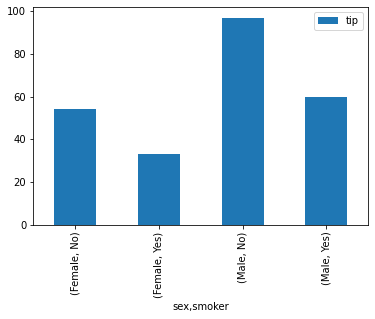

In [87]:
df = pd.read_csv('tips.csv')
# df.plot()
# df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')
# df['day'].value_counts().plot(kind = 'bar', 
#                               grid = True, 
#                               colormap = 'coolwarm', 
#                               title = 'Количество посетителей по дням')
# df.plot(x = 'total_bill', 
#         y = 'tip', 
#         kind = 'scatter', 
#         grid = True, 
#         title = 'Общая сумма счёта Vs сумма чаевых')
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean')
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

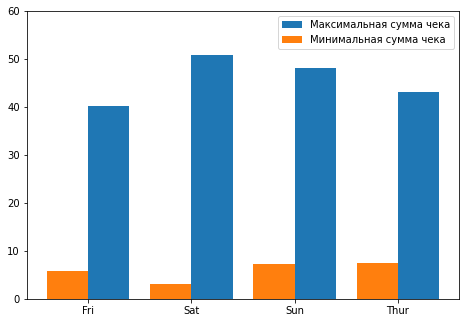

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tips.csv')

# fig = plt.figure()
# axes = fig.add_axes([0, 0, 1, 2])
# axes.hist(df['total_bill'], bins = 20, color = 'green')
# axes.set_title('Общая сумма счета')
# axes.set_ylabel('Количество заказов')
# axes.set_xlabel('Сумма заказа, USD')

bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
# fig = plt.figure()
# main_axes = fig.add_axes([0, 0, 1, 1])
# main_axes.hist(df['total_bill'])
# insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
# insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
#                 width = 0.4, align = 'edge')
# insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
#                 width = -0.4, align = 'edge')

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)